<a href="https://colab.research.google.com/github/aidanvu1992/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Anh_Vu_DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

In [0]:
# TODO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scs
%matplotlib inline

In [0]:
#Loading data and updating column names
credit_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
crx = pd.read_csv(credit_url, header=None, 
                  names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 
                          'A12', 'A13', 'A14', 'A15', 'A16'])

In [7]:
crx.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [8]:
#Check for missing values
crx.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
#replace ? value with NaN
crx = crx.replace('?', np.NaN)

In [13]:
# Recheck for missing values
crx.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [14]:
#Check each column type
crx.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
#Function to convert columns to float
def float_conversion(a):
  crx[a] = crx[a].astype(float)
  return crx[a]

In [24]:
#Converting A2, A11, A14, A15 to float
float_conversion('A2')
float_conversion('A11')
float_conversion('A14')
float_conversion('A15')

0          0.0
1        560.0
2        824.0
3          3.0
4          0.0
5          0.0
6      31285.0
7       1349.0
8        314.0
9       1442.0
10         0.0
11       200.0
12         0.0
13      2690.0
14         0.0
15         0.0
16         0.0
17       245.0
18         0.0
19         0.0
20      1208.0
21         0.0
22      1260.0
23        11.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29     10000.0
        ...   
660        0.0
661        0.0
662        0.0
663        0.0
664        0.0
665        0.0
666        0.0
667        5.0
668        0.0
669        1.0
670      150.0
671        2.0
672      117.0
673       17.0
674      246.0
675      237.0
676        3.0
677        1.0
678       50.0
679        0.0
680      364.0
681      537.0
682        2.0
683        3.0
684        0.0
685        0.0
686      394.0
687        1.0
688      750.0
689        0.0
Name: A15, Length: 690, dtype: float64

In [25]:
# Recheck columns type to make sure the object ones were correctly converted to float
crx.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [26]:
# TODO
#Checking unique values from column A16
crx['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [0]:
# + represents approval credit application while - represents the denial ones. Creating 2 subset dataframes for these 2 classes.
approval = crx[crx['A16'] == '+']
denial = crx[crx['A16'] == '-']

In [76]:
# Check new subsets
approval.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [77]:
denial.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


# T-test for float columns

In [0]:
# I only need the columns with float values for t-test, so choosing the 6 float columns

float_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

approval_float = approval[float_cols]
denial_float = denial[float_cols]

In [67]:
approval_float.head()

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1.0,202.0,0.0
1,58.67,4.460,3.04,6.0,43.0,560.0
2,24.50,0.500,1.50,0.0,280.0,824.0
3,27.83,1.540,3.75,5.0,100.0,3.0
4,20.17,5.625,1.71,0.0,120.0,0.0


In [68]:
denial_float.head()

,A2,A3,A8,A11,A14,A15
70,32.33,7.5,1.585,0.0,420.0,0.0
71,34.83,4.0,12.500,0.0,NaN,0.0
72,38.58,5.0,13.500,0.0,980.0,0.0
73,44.25,0.5,10.750,0.0,400.0,0.0
74,44.83,7.0,1.625,0.0,160.0,2.0


In [69]:
# Next, find means of each column of the 2 datasets

approval_float.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [70]:
denial_float.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [0]:
# Creating function to find pvalue of given columns
def get_pvalue(k):
  approval_float_col = approval_float[k]
  denial_float_col = denial_float[k]
  return scs.ttest_ind(approval_float_col, denial_float_col, equal_var = False, nan_policy = 'omit')

In [72]:
# Using the function to find p-value of all columns from both datasets, then determine which one is extremely different and which one is less different
print('A2:', get_pvalue('A2'))
print('A3:', get_pvalue('A3'))
print('A8:', get_pvalue('A8'))
print('A11:', get_pvalue('A11'))
print('A14:', get_pvalue('A14'))
print('A15:', get_pvalue('A15'))

A2: Ttest_indResult(statistic=4.224490929851236, pvalue=2.7673850124552034e-05)
A3: Ttest_indResult(statistic=5.392530906223675, pvalue=1.0158807568737146e-07)
A8: Ttest_indResult(statistic=8.38006008674286, pvalue=7.425348666782441e-16)
A11: Ttest_indResult(statistic=10.6384190682749, pvalue=4.310254123415665e-23)
A14: Ttest_indResult(statistic=-2.6696493137915973, pvalue=0.0077778250827957)
A15: Ttest_indResult(statistic=4.196600236397611, pvalue=3.5433798702024966e-05)


In [0]:
# Based on all the found ttest, A11 appears to be the feature that is extremely different between 2 classes while A14 is the feature that is less extreme between the 2 classes.

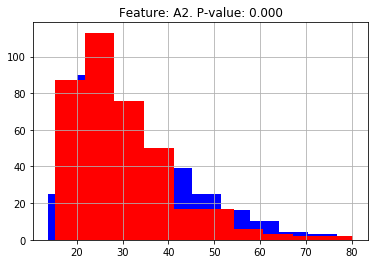

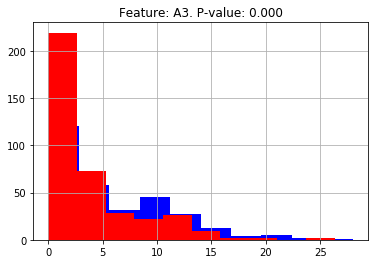

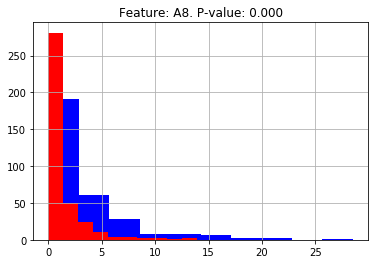

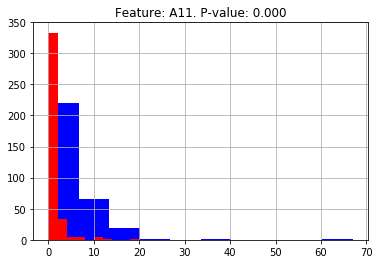

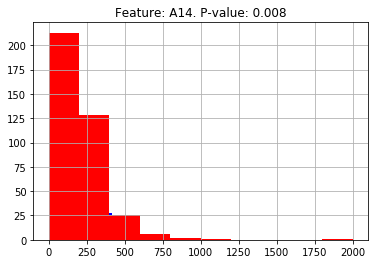

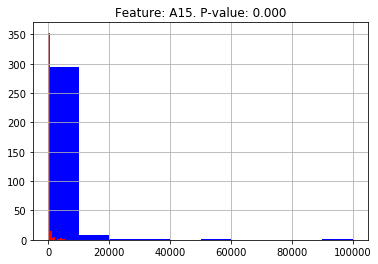

<Figure size 432x288 with 0 Axes>

In [73]:
# Visualize difference of features between approval and denial datasets
i = crx
def plotpval(i):
  columns = float_cols
  for col in columns:
    group1 = approval_float[col]
    group2 = denial_float[col]
    group1.hist(color='b')
    group2.hist(color='r')
    _, pvalue = scs.ttest_ind(group1, group2, equal_var=False, nan_policy='omit')
    plt.title(f'Feature: {col}. P-value: {pvalue:.3f}')
    plt.figure()

plotpval(i)

# Chi-squared test for categorial columns

In [0]:
# Create another 2 approval and denial dataframes for categorial columns
cat_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']
crx_cat = crx[cat_cols]

In [92]:
crx_cat.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+


In [95]:
help(scs.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [0]:
# Create function for pd_crosstab method
def crosstab(y):
  return pd.crosstab(crx_cat['A16'], crx[y])

In [0]:
# Create function to calculate Chi-Squared test

def chi_squared(x):
  return scs.chi2_contingency(crosstab(x))

In [89]:
# Check column A1

print(crosstab('A1'))
print(chi_squared('A1'))

A1     a    b
A16          
+     98  206
-    112  262
(0.31128326491619945, 0.5768937883001117, 1, array([[ 94.15929204, 209.84070796],
       [115.84070796, 258.15929204]]))


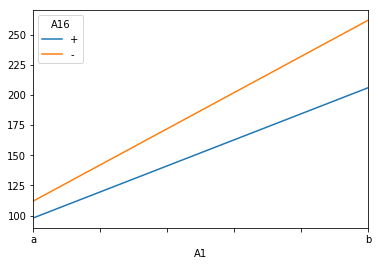

In [99]:
# Visualiztion for A1

crosstab('A1').T.plot()

In [93]:
# Check column A4
print(crosstab('A4'))
print(chi_squared('A4'))

A4   l    u    y
A16             
+    2  256   45
-    0  263  118
(26.234074966202144, 2.010680204180363e-06, 2, array([[  0.88596491, 229.90789474,  72.20614035],
       [  1.11403509, 289.09210526,  90.79385965]]))


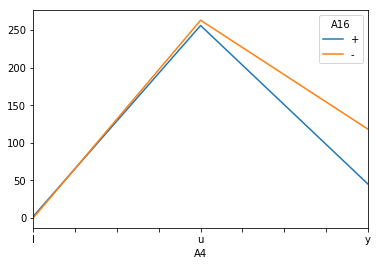

In [98]:
# Visualiztion for crosstab A4

crosstab('A4').T.plot()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1/ With the function I created, I was able to t-test all the columns.
  - With p-value of 0.007, the column A14 shows that the difference between approval and denial application is less extreme
  - With p-value of 7.42 * e^-16, the column A8 shows that the difference between approval and denial application is  extreme
  
2/ I performed 2 chi-squared tests on A1 and A4. p-value of A1 is 0.57 while p-value of A4 is 2.01 * e^-6. This shows that there is some dependence between A1 and class column while independence appeared to be the relationship between A4 and the class column

3/ The most challenging part is the analysis and interpretation, at least to my perspective

```
# This is formatted as code
```

*Your words here!*